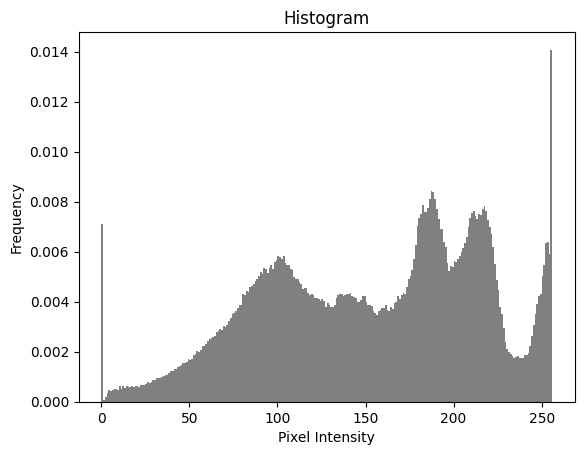

Entropy 1: 7.655536276849164, SNR 1: -0.17994364960107032
Entropy 2: 7.761989525722427, SNR 2: -0.17842930274137353


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(file_path):
    return cv2.imread(file_path, cv2.IMREAD_COLOR)

def save_image(image, file_name):
    cv2.imwrite(file_name, image)

def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def mean_filter(image, kernel_size=5):
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image.astype(np.uint8)

def median_filter(image, kernel_size=5):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image.astype(np.uint8)

def contrast_stretching_linear(image):
    p2, p98 = np.percentile(image, (2, 98))
    stretched_image = np.clip((image - p2) * (255.0 / (p98 - p2)), 0, 255)
    return stretched_image.astype(np.uint8)

def contrast_stretching_power_law(image, gamma=0.5):
    stretched_image = np.power(image / 255.0, gamma) * 255.0
    return stretched_image.astype(np.uint8)

def deblurring_kernel(image, kernel):
    return cv2.filter2D(image, -1, kernel)

def laplacian_edge_detection(image):
    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])
    edges = cv2.filter2D(image, -1, laplacian_kernel)
    return edges

def apply_additional_operation(original_image, processed_image):
    edges = laplacian_edge_detection(original_image)
    enhanced_image = cv2.add(processed_image, edges)
    enhanced_image = np.clip(enhanced_image, 0, 255)
    return enhanced_image.astype(np.uint8)

def plot_histogram(image, output_path):
    plt.hist(image.flatten(), bins=256, range=[0, 256], color='gray', density=True)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.savefig(output_path)
    plt.show()

def compute_entropy(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256], density=True)
    hist = hist[hist > 0]
    entropy = -np.sum(hist * np.log2(hist))
    return entropy

def compute_snr(original_image, processed_image):
    mse = np.mean((original_image - processed_image) ** 2)
    snr = 10 * np.log10(np.mean(original_image ** 2) / mse)
    return snr

def choose_best_algorithm(original_image, algorithm_1, algorithm_2, stage_name):
    snr_1 = compute_snr(original_image, algorithm_1)
    snr_2 = compute_snr(original_image, algorithm_2)

    if snr_1 > snr_2:
        print(f"Using Algorithm 1 for {stage_name} (SNR: {snr_1:.2f} dB)")
        return algorithm_1, snr_1
    else:
        print(f"Using Algorithm 2 for {stage_name} (SNR: {snr_2:.2f} dB)")
        return algorithm_2, snr_2

# Step 1: Load and convert to grayscale
original_image = load_image("/content/SampleImage.png")
gray_image = convert_to_grayscale(original_image)
save_image(gray_image, "200636H_step1_gray.png")

# Step 2: Noise filtering
filtered_image_1_noise_mean = mean_filter(gray_image)
filtered_image_2_noise_median = median_filter(filtered_image_1_noise_mean)

save_image(filtered_image_1_noise_mean, "200636H_step2_filtered_noise_mean.png")
save_image(filtered_image_2_noise_median, "200636H_step2_filtered_noise_median.png")

# Step 3: Contrast stretching
filtered_image_3_contrast_stretching_1 = contrast_stretching_linear(filtered_image_2_noise_median)
filtered_image_4_contrast_stretching_2 = contrast_stretching_power_law(filtered_image_3_contrast_stretching_1)

save_image(filtered_image_3_contrast_stretching_1, "200636H_step3_contrast_stretching_1.png")
save_image(filtered_image_4_contrast_stretching_2, "200636H_step3_contrast_stretching_2.png")

# Step 4: Deblurring
kernel_1 = np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])

kernel_2 = np.ones((5, 5)) / 25.0

filtered_image_5_deblurring_1 = deblurring_kernel(filtered_image_4_contrast_stretching_2, kernel_1)
filtered_image_6_deblurring_2 = deblurring_kernel(filtered_image_5_deblurring_1, kernel_2)

save_image(filtered_image_5_deblurring_1, "200636H_step4_deblurring_1.png")
save_image(filtered_image_6_deblurring_2, "200636H_step4_deblurring_2.png")

final_image = apply_additional_operation(filtered_image_6_deblurring_2, filtered_image_6_deblurring_2)
save_image(final_image, "final_image.png")

# Step 5: Plot histograms
plot_histogram(final_image, "200636H_histogram_final_image.png")

# Step 6: Compute entropy and SNR
entropy_value_1 = compute_entropy(filtered_image_5_deblurring_1)
snr_value_1 = compute_snr(gray_image, filtered_image_5_deblurring_1)

entropy_value_2 = compute_entropy(filtered_image_6_deblurring_2)
snr_value_2 = compute_snr(gray_image, filtered_image_6_deblurring_2)

print(f"Entropy 1: {entropy_value_1}, SNR 1: {snr_value_1}")
print(f"Entropy 2: {entropy_value_2}, SNR 2: {snr_value_2}")
